In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Define the base directory path where the data is located
dir_path = "data/"
# Create the path for the 'test' directory by joining 'dir_path' and 'test'
test_path = os.path.join(dir_path, "test")
# Create the path for the 'train' directory by joining 'dir_path' and 'train'
train_path = os.path.join(dir_path, "train")

In [4]:
# Create a data generator for training images with augmentation settings
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                            rotation_range=30,
                                                            width_shift_range=0.2,
                                                            height_shift_range=0.2,
                                                            shear_range=0.3,
                                                            zoom_range=0.3,
                                                            horizontal_flip=True)
# Generate training data from the 'train' directory
train_data = train_gen.flow_from_directory(train_path,
                                           target_size=(150, 150),
                                           shuffle=True,
                                           class_mode="binary")
# Create a data generator for testing images
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
# Generate test data from the 'test' directory
test_data = test_gen.flow_from_directory(test_path,
                                         target_size=(150, 150),
                                         shuffle=True,
                                         class_mode="binary")

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


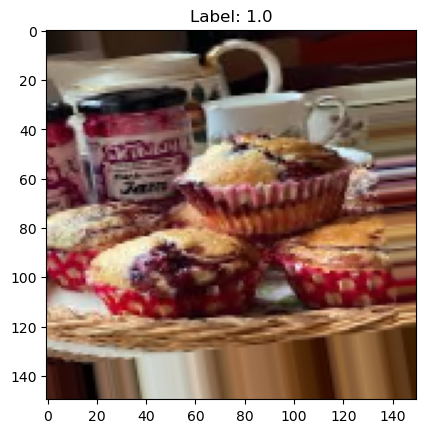

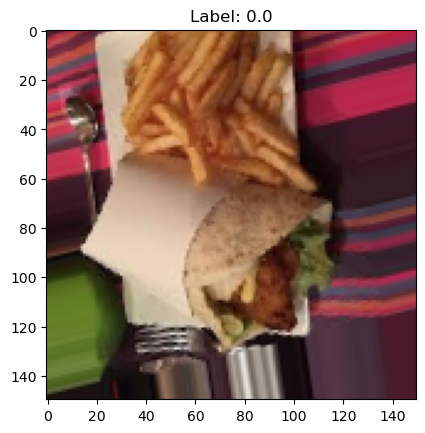

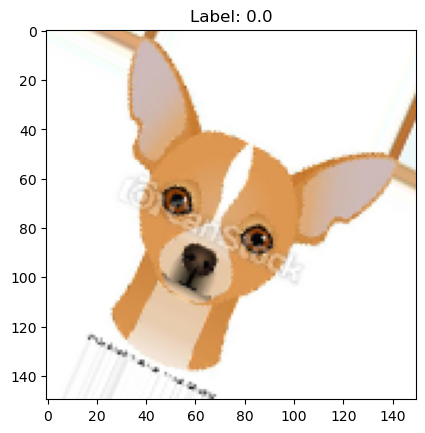

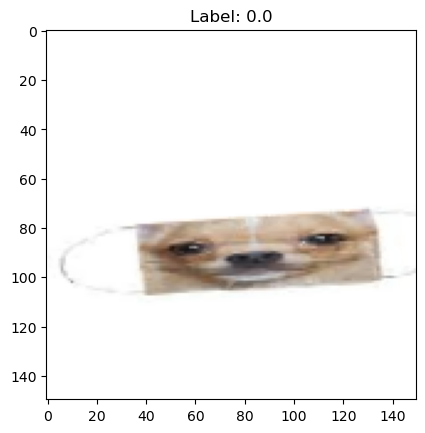

In [5]:
batch_images, batch_labels = next(train_data)

# Define the number of images you want to display
num_images_to_display = 4

# Loop through the images and display them
for i in range(num_images_to_display):
    plt.figure()
    plt.imshow(batch_images[i])
    plt.title(f"Label: {batch_labels[i]}")
    plt.show()

# Model trained only on the given data (Without using pretrained model)

In [7]:
# Create a sequential neural network model
model_scratch = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(150, 150, 3)),
                                     tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.MaxPooling2D(2),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.MaxPooling2D(2),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.MaxPooling2D(2),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
                                     tf.keras.layers.MaxPooling2D(2),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(units=128, activation="relu"),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(units=32, activation="relu"),
                                     tf.keras.layers.Dropout(0.1),
                                     tf.keras.layers.Dense(units=1, activation="sigmoid")
                                    ])
# Compile the model
model_scratch.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss=tf.keras.losses.binary_crossentropy,
                      metrics="acc")

In [9]:
# load the model
model_scratch = tf.keras.models.load_model("models/model_muffin_vs_chihuahua_scratch.h5")

In [10]:
# show the model`s summary
model_scratch.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 150, 150, 8)       224       
                                                                 
 conv2d_21 (Conv2D)          (None, 150, 150, 8)       584       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 8)        0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 75, 75, 8)        32        
 hNormalization)                                                 
                                                                 
 conv2d_22 (Conv2D)          (None, 75, 75, 16)        1168      
                                                                 
 conv2d_23 (Conv2D)          (None, 75, 75, 16)       

In [17]:
# train the model
history = model_scratch.fit(train_data, validation_data=test_data, epochs=100)

Epoch 1/100
148/148 [==============================] - 35s 237ms/step - loss: 0.1687 - acc: 0.9389 - val_loss: 0.1499 - val_acc: 0.9383
Epoch 2/100
148/148 [==============================] - 35s 237ms/step - loss: 0.1565 - acc: 0.9425 - val_loss: 0.1941 - val_acc: 0.9206
Epoch 3/100
148/148 [==============================] - 36s 239ms/step - loss: 0.1630 - acc: 0.9411 - val_loss: 0.3781 - val_acc: 0.8184
Epoch 4/100
148/148 [==============================] - 35s 238ms/step - loss: 0.1528 - acc: 0.9400 - val_loss: 0.2537 - val_acc: 0.8970
Epoch 5/100
148/148 [==============================] - 35s 238ms/step - loss: 0.1471 - acc: 0.9436 - val_loss: 0.2139 - val_acc: 0.9139
Epoch 6/100
148/148 [==============================] - 36s 245ms/step - loss: 0.1442 - acc: 0.9474 - val_loss: 0.1742 - val_acc: 0.9358
Epoch 7/100
148/148 [==============================] - 35s 238ms/step - loss: 0.1427 - acc: 0.9449 - val_loss: 0.1757 - val_acc: 0.9291
Epoch 8/100
148/148 [===========================

Epoch 61/100
148/148 [==============================] - 38s 254ms/step - loss: 0.0891 - acc: 0.9683 - val_loss: 0.1727 - val_acc: 0.9257
Epoch 62/100
148/148 [==============================] - 41s 280ms/step - loss: 0.0989 - acc: 0.9618 - val_loss: 0.1124 - val_acc: 0.9561
Epoch 63/100
148/148 [==============================] - 43s 290ms/step - loss: 0.1005 - acc: 0.9639 - val_loss: 0.1038 - val_acc: 0.9544
Epoch 64/100
148/148 [==============================] - 45s 302ms/step - loss: 0.0916 - acc: 0.9630 - val_loss: 0.1402 - val_acc: 0.9451
Epoch 65/100
148/148 [==============================] - 42s 281ms/step - loss: 0.0807 - acc: 0.9717 - val_loss: 0.4898 - val_acc: 0.8733
Epoch 66/100
148/148 [==============================] - 44s 294ms/step - loss: 0.0924 - acc: 0.9670 - val_loss: 0.1166 - val_acc: 0.9485
Epoch 67/100
148/148 [==============================] - 38s 257ms/step - loss: 0.0891 - acc: 0.9683 - val_loss: 0.1130 - val_acc: 0.9527
Epoch 68/100
148/148 [===================

In [18]:
# save the model
model_scratch.save("models/model_muffin_vs_chihuahua_scratch.h5")

In [19]:
# evaluate the model on the validation data again
model_scratch.evaluate(test_data)

37/37 [==============================] - 4s 101ms/step - loss: 0.1144 - acc: 0.9544


[0.11440347880125046, 0.9543918967247009]

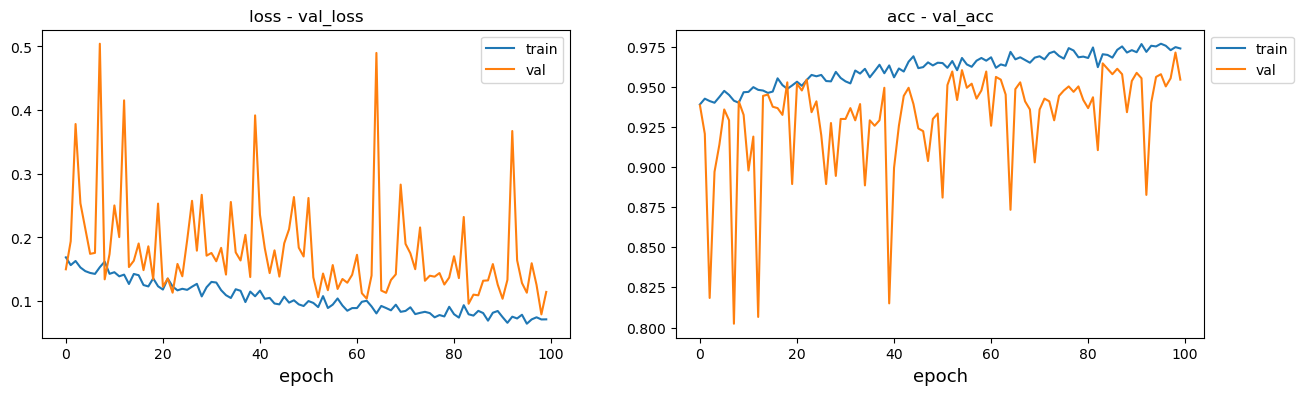

In [20]:
# plotting the history of training
fig, axis = plt.subplots(1, 2, figsize=(15, 4))

axis[0].plot(history.history["loss"], label="train")
axis[0].plot(history.history["val_loss"], label="val")
axis[0].set_title("loss - val_loss")
axis[0].set_xlabel("epoch", fontsize=13)
axis[0].legend(bbox_to_anchor=(1.0, 1.0))


axis[1].plot(history.history["acc"], label="train")
axis[1].plot(history.history["val_acc"], label="val")
axis[1].set_title("acc - val_acc")
axis[1].set_xlabel("epoch", fontsize=13)
axis[1].legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

1/1 [==============================] - 0s 15ms/step


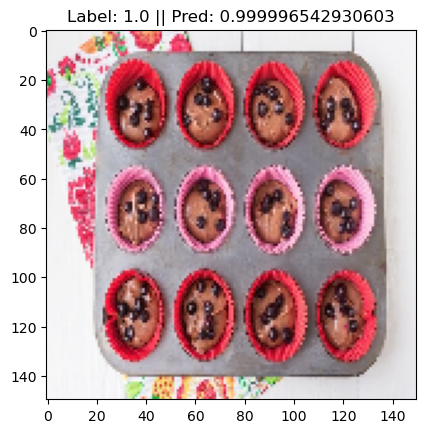

1/1 [==============================] - 0s 15ms/step


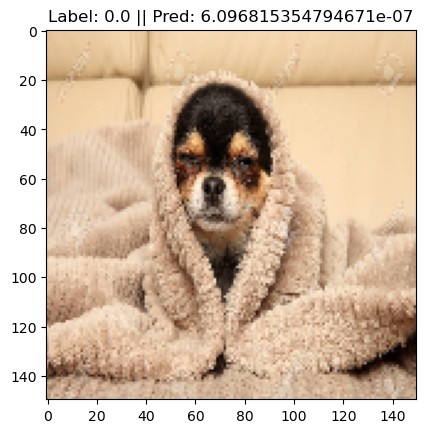

1/1 [==============================] - 0s 15ms/step


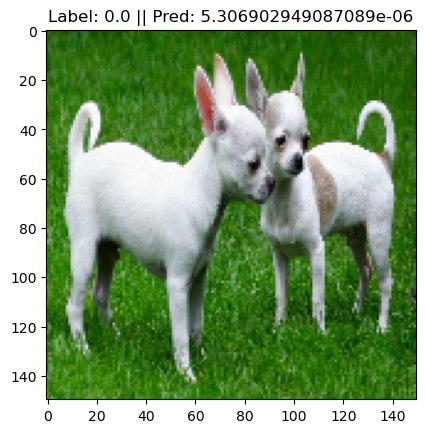

1/1 [==============================] - 0s 15ms/step


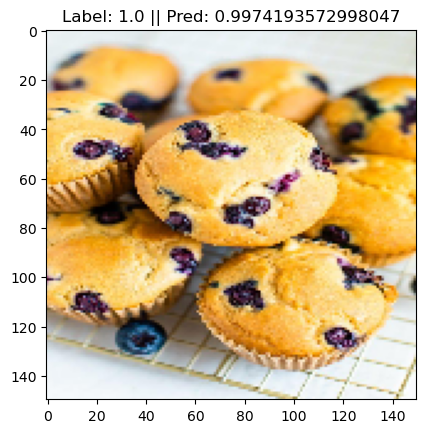

1/1 [==============================] - 0s 14ms/step


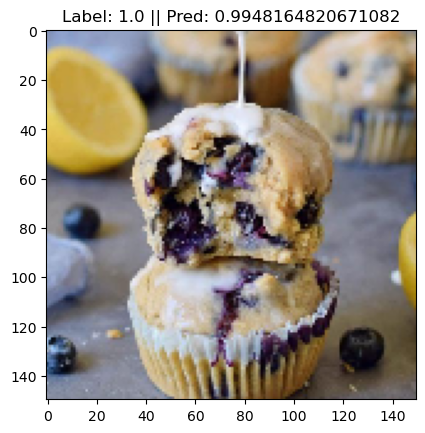

1/1 [==============================] - 0s 15ms/step


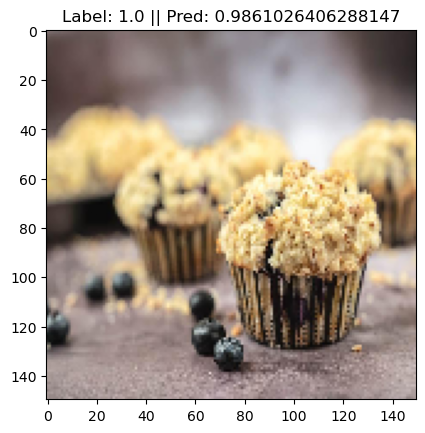

1/1 [==============================] - 0s 16ms/step


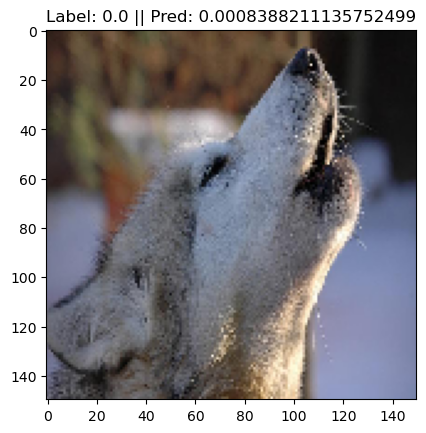

1/1 [==============================] - 0s 17ms/step


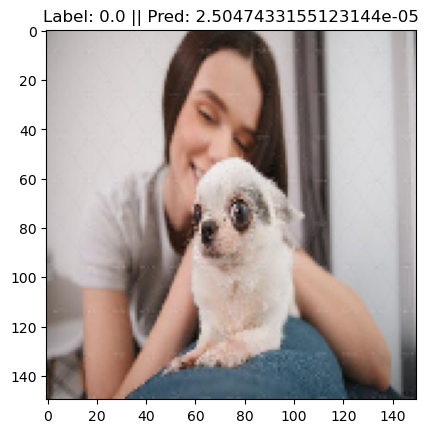

1/1 [==============================] - 0s 16ms/step


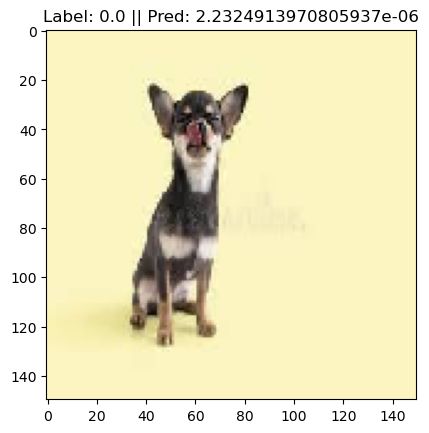

In [22]:
batch_images, batch_labels = next(test_data)

# Define the number of images you want to display
num_images_to_display = 9

# Loop through the images and display them
for i in range(num_images_to_display):
    plt.figure()
    plt.imshow(batch_images[i])
    plt.title(f"Label: {batch_labels[i]} || Pred: {model_scratch.predict(batch_images[i][None]).sum()}")
    plt.show()

# Model trained using pretrained model

In [8]:
# Create a pre-trained MobileNetV2 model with specific settings
pretrained_model = tf.keras.applications.MobileNetV2(include_top=False,
                                                     classes=2,
                                                     input_shape=(150, 150, 3),
                                                     classifier_activation="sigmoid")
# Iterate through the layers of the pre-trained model and set them as non-trainable (freeze the layers)
for layer in pretrained_model.layers:
    layer.trainable = False

In [9]:
# showing the summary of the pretrained model
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 19, 19, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 19, 19, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 19, 19, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 19, 19, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [10]:
# creating a more complex model using the pretrained model
model_complex = tf.keras.Sequential([pretrained_model,
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(units=128, activation="relu"),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(units=32, activation="relu"),
                                     tf.keras.layers.Dropout(0.1),
                                     tf.keras.layers.Dense(units=1, activation="sigmoid")
                                    ])
# compile the model
model_complex.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss=tf.keras.losses.binary_crossentropy,
                      metrics="acc")

In [17]:
# load the model
model_complex = tf.keras.models.load_model("models/model_muffin_vs_chihuahua_complex.h5")

In [11]:
# showing the models summary
model_complex.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 32000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4096128   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                      

In [12]:
# train the model
history = model_complex.fit(train_data, validation_data=test_data, epochs=100)

Epoch 1/100
148/148 [==============================] - 46s 299ms/step - loss: 0.5122 - acc: 0.9349 - val_loss: 0.1030 - val_acc: 0.9713
Epoch 2/100
148/148 [==============================] - 45s 305ms/step - loss: 0.1387 - acc: 0.9588 - val_loss: 0.0582 - val_acc: 0.9814
Epoch 3/100
148/148 [==============================] - 47s 316ms/step - loss: 0.1003 - acc: 0.9660 - val_loss: 0.0360 - val_acc: 0.9873
Epoch 4/100
148/148 [==============================] - 45s 304ms/step - loss: 0.0889 - acc: 0.9687 - val_loss: 0.0348 - val_acc: 0.9907
Epoch 5/100
148/148 [==============================] - 45s 303ms/step - loss: 0.0874 - acc: 0.9711 - val_loss: 0.0336 - val_acc: 0.9916
Epoch 6/100
148/148 [==============================] - 46s 307ms/step - loss: 0.0858 - acc: 0.9645 - val_loss: 0.0375 - val_acc: 0.9873
Epoch 7/100
148/148 [==============================] - 45s 305ms/step - loss: 0.0825 - acc: 0.9717 - val_loss: 0.0395 - val_acc: 0.9865
Epoch 8/100
148/148 [===========================

Epoch 61/100
148/148 [==============================] - 60s 408ms/step - loss: 0.0252 - acc: 0.9913 - val_loss: 0.0319 - val_acc: 0.9907
Epoch 62/100
148/148 [==============================] - 61s 412ms/step - loss: 0.0263 - acc: 0.9913 - val_loss: 0.0300 - val_acc: 0.9890
Epoch 63/100
148/148 [==============================] - 60s 404ms/step - loss: 0.0284 - acc: 0.9928 - val_loss: 0.0306 - val_acc: 0.9899
Epoch 64/100
148/148 [==============================] - 60s 406ms/step - loss: 0.0296 - acc: 0.9918 - val_loss: 0.0350 - val_acc: 0.9890
Epoch 65/100
148/148 [==============================] - 61s 408ms/step - loss: 0.0359 - acc: 0.9869 - val_loss: 0.0434 - val_acc: 0.9848
Epoch 66/100
148/148 [==============================] - 60s 403ms/step - loss: 0.0222 - acc: 0.9901 - val_loss: 0.0417 - val_acc: 0.9899
Epoch 67/100
148/148 [==============================] - 58s 392ms/step - loss: 0.0251 - acc: 0.9903 - val_loss: 0.0417 - val_acc: 0.9873
Epoch 68/100
148/148 [===================

In [13]:
# save the model
model_complex.save("models/model_muffin_vs_chihuahua_complex.h5")

In [14]:
# evaluate the model on validation set again to see its final performance
model_complex.evaluate(test_data)

37/37 [==============================] - 7s 175ms/step - loss: 0.0468 - acc: 0.9882


[0.0467856302857399, 0.9881756901741028]

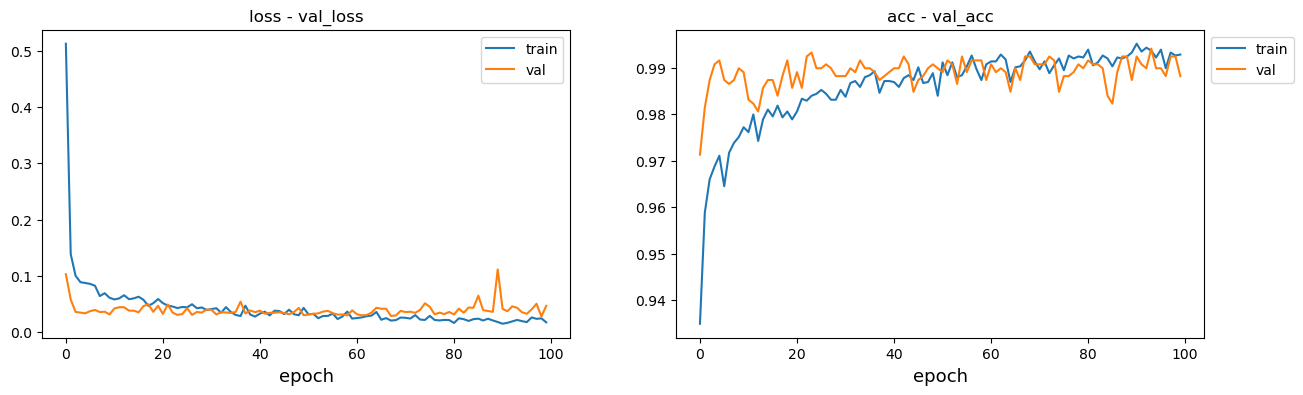

In [15]:
# plotting the history of training
fig, axis = plt.subplots(1, 2, figsize=(15, 4))

axis[0].plot(history.history["loss"], label="train")
axis[0].plot(history.history["val_loss"], label="val")
axis[0].set_title("loss - val_loss")
axis[0].set_xlabel("epoch", fontsize=13)
axis[0].legend(bbox_to_anchor=(1.0, 1.0))


axis[1].plot(history.history["acc"], label="train")
axis[1].plot(history.history["val_acc"], label="val")
axis[1].set_title("acc - val_acc")
axis[1].set_xlabel("epoch", fontsize=13)
axis[1].legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

1/1 [==============================] - 0s 497ms/step


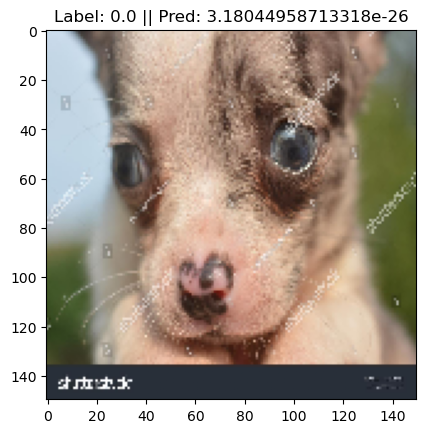

1/1 [==============================] - 0s 27ms/step


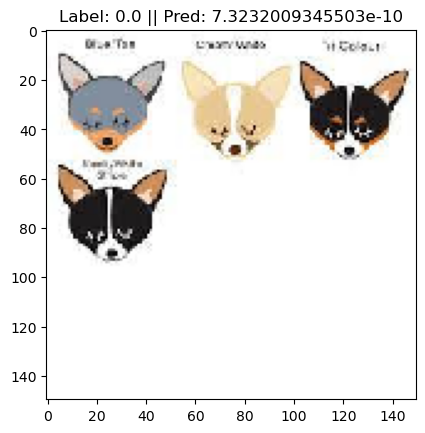

1/1 [==============================] - 0s 29ms/step


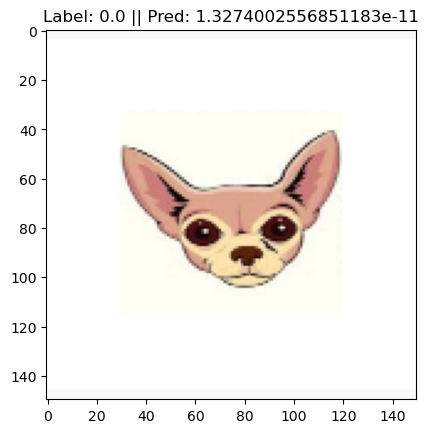

1/1 [==============================] - 0s 26ms/step


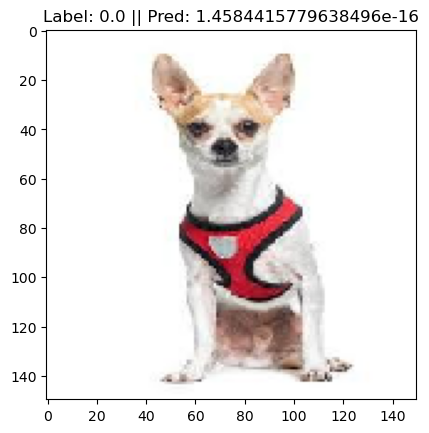

1/1 [==============================] - 0s 28ms/step


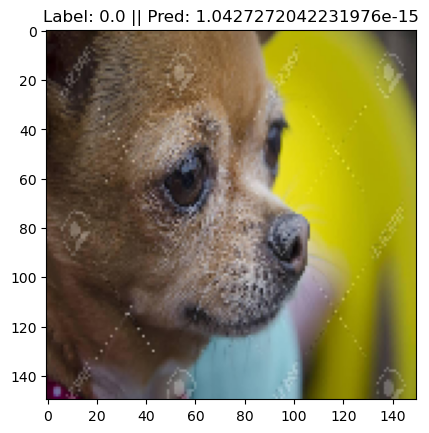

1/1 [==============================] - 0s 27ms/step


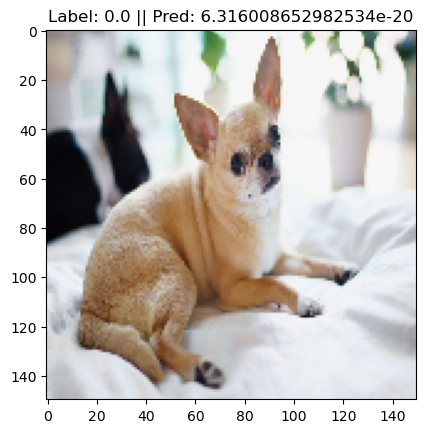

1/1 [==============================] - 0s 26ms/step


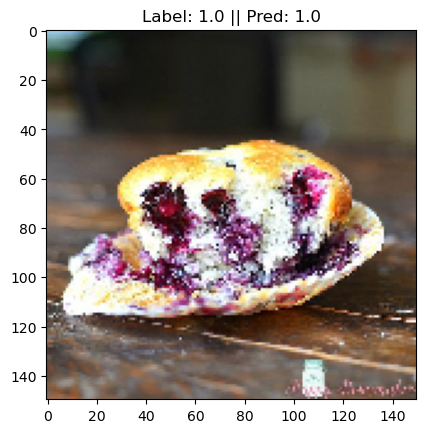

1/1 [==============================] - 0s 26ms/step


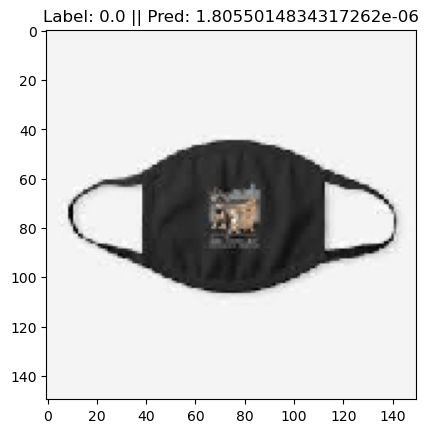

1/1 [==============================] - 0s 24ms/step


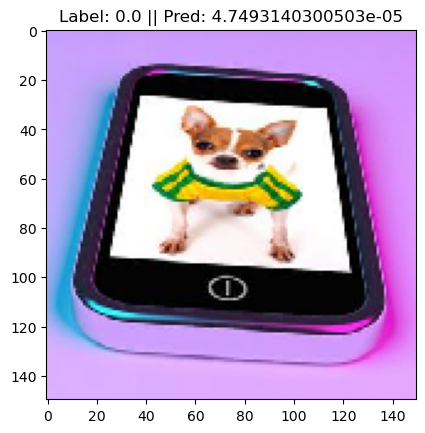

In [16]:
batch_images, batch_labels = next(test_data)

# Define the number of images you want to display
num_images_to_display = 9

# Loop through the images and display them
for i in range(num_images_to_display):
    plt.figure()
    plt.imshow(batch_images[i])
    plt.title(f"Label: {batch_labels[i]} || Pred: {model_complex.predict(batch_images[i][None]).sum()}")
    plt.show()